# Exercise 5.23

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Math
from scipy import stats
from chapter_5_utils import my_q_q_plot, bonferroni_conf_int, simult_conf_int

Researchers have suggested that a change in skull size over time is evidence of the interbreeding
of a resident population with immigrant populations. Four measurements were
made of male Egyptian skulls for three different time periods: period 1 is 4000 B.C., period 2 is 3300 B.C., and period 3 is 1850 B.C.
- $X_{1}$ = (MaxBreath) maximum breadth of skull (mm)
- $X_{2}$ = (BasHeight) basibregmatic height of skull (mm)
- $X_{3}$ = (BasLength) basialveolar length of skull (mm)
- $X_{4}$ = (NasHeight) nasal height of skull (mm)
- $X_{5}$ = (TimePeriod)

In [2]:
def load_data() -> pd.DataFrame:
    # Load the Egyptian skull data.
    fpath = pathlib.WindowsPath(r'..\..\data\Table6.13.xlsx')
    return pd.read_excel(fpath)

In [3]:
skull_df = load_data()
skull_df.head(3)

,MaxBreath,BasHeight,BasLength,NasHeight,TimePeriod
0,131,138,89,49,1
1,125,131,92,48,1
2,131,132,99,50,1


## (a)

In [4]:
X = skull_df[skull_df.TimePeriod.eq(1)].iloc[:, 0:-1].to_numpy()
n, p = X.shape

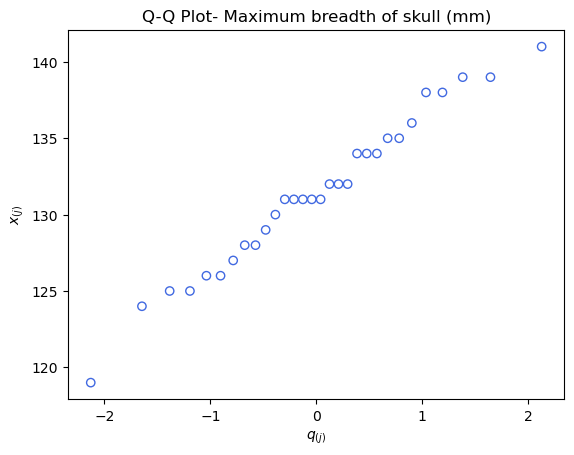

In [5]:
my_q_q_plot(X[:,0])
ax = plt.gca()
plt.title('Q-Q Plot- Maximum breadth of skull (mm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-23-a-QQ-MaxBreath.png')
plt.show()

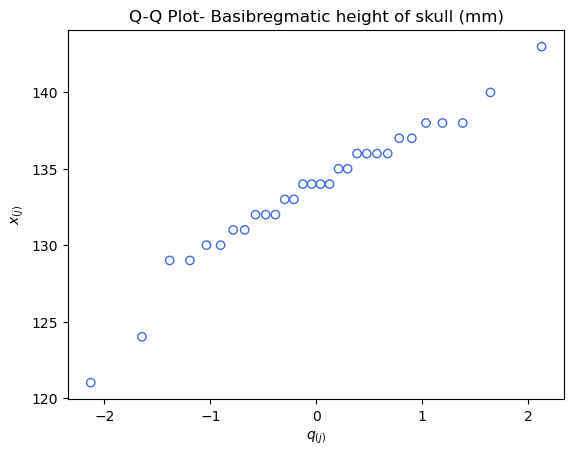

In [6]:
my_q_q_plot(X[:,1])
ax = plt.gca()
plt.title('Q-Q Plot- Basibregmatic height of skull (mm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-23-a-QQ-BasHeight.png')
plt.show()

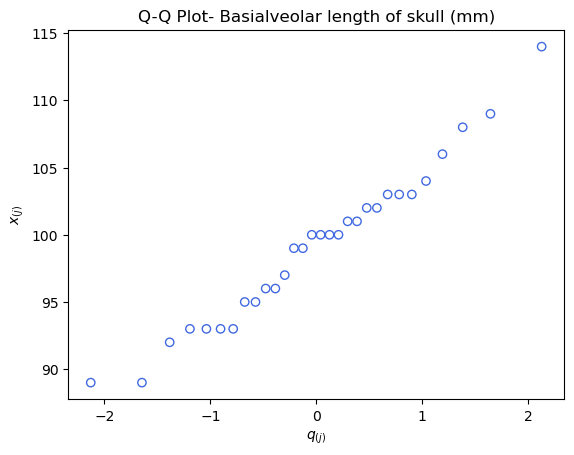

In [7]:
my_q_q_plot(X[:,2])
ax = plt.gca()
plt.title('Q-Q Plot- Basialveolar length of skull (mm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-23-a-QQ-BasLength.png')
plt.show()

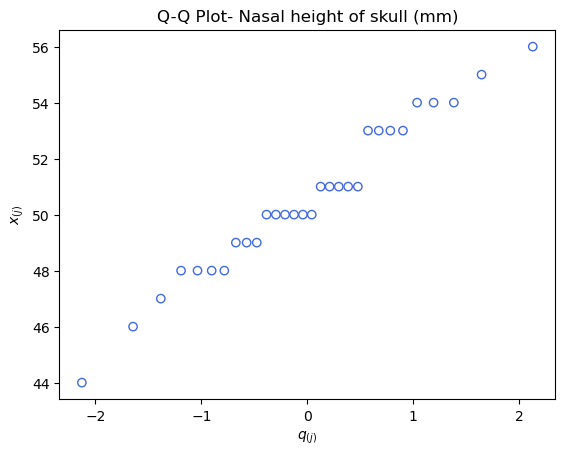

In [8]:
my_q_q_plot(X[:,3])
ax = plt.gca()
plt.title('Q-Q Plot- Nasal height of skull (mm)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-23-a-QQ-NasHeight.png')
plt.show()

In [9]:
xbar = np.mean(X, axis = 0).reshape(p, 1)
S = np.cov(X, rowvar=False)

In [10]:
xbar

array([[131.36666667],
       [133.6       ],
       [ 99.16666667],
       [ 50.53333333]])

In [11]:
S

array([[26.3091954 ,  4.15172414,  0.45402299,  7.24597701],
       [ 4.15172414, 19.97241379, -0.79310345,  0.39310345],
       [ 0.45402299, -0.79310345, 34.62643678, -1.91954023],
       [ 7.24597701,  0.39310345, -1.91954023,  7.63678161]])

In [12]:
# Compute the squared distance values to create a chi-squared plot.
d2_data = list()
for i in range(n):
    d2 = ((X[i,:].reshape(p, 1) - xbar).T @ np.linalg.inv(S) @ (X[i,:].reshape(p, 1) - xbar)).item()
    d2_data.append(d2)
d2_data.sort()

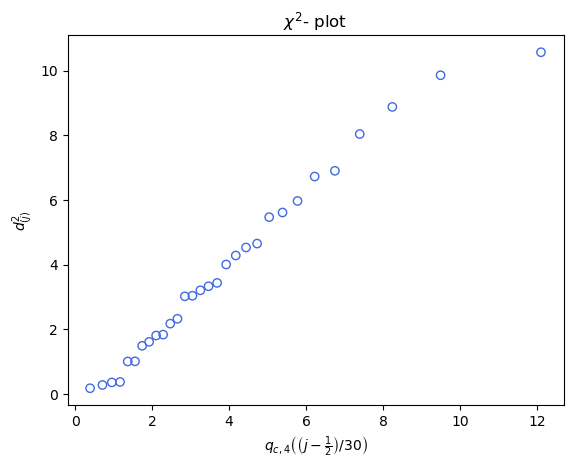

In [13]:
plt.scatter(
    stats.chi2.ppf([((i+1) - 0.50)/n for i in range(n)], df=p),
    d2_data,
    facecolors='none',
    edgecolors='royalblue'
)
plt.xlabel(fr'$q_{{c,{p}}}\left(\left(j-\frac{{1}}{{2}}\right)/{n}\right)$')
plt.ylabel('$d_{(j)}^{2}$')
plt.title('$\chi^{2}$- plot')
plt.savefig('Question-5-23-a-chi2.png')
plt.show()

## (b)

## The 95% $T^{2}$ simultaneous confidence intervals:

$$
\bar{x}_{i}
\pm
\sqrt{
    \frac{(n-1)p}{(n-p)}
    F_{p, n-p}\left(\alpha\right)
}
\sqrt{
    \frac{s_{ii}}{n}
}
$$

In [14]:
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha, p, n-p)
const = ((n-1)*p)/(n-p)

In [15]:
# Computed by-hand as a check.
# xbar + np.array([-1, 1]) * np.sqrt(const*f_crit) * np.sqrt(np.diag(S).reshape(p, 1)/n)

In [16]:
simult_ci = simult_conf_int(X, alpha=alpha, p=p)
simult_ci

array([[128.09087519, 134.64245814],
       [130.74584376, 136.45415624],
       [ 95.40858368, 102.92474966],
       [ 48.7684433 ,  52.29822337]])

In [17]:
for i in range(simult_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm \sqrt{{{const*f_crit:.2f}}} '\
                 fr'\frac{{\sqrt{{{S[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{simult_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {simult_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## The 95% Bonferroni confidence intervals:

$$
\bar{x}_{i}
\pm
t_{n-1}
\left(\frac{\alpha}{2m}\right)
\sqrt{
    \frac{
            s_{ii}
        }{
            n
        }
    }

In [18]:
m = p
t_crit = stats.t.ppf(1 - alpha/(2*m), n-1)

In [19]:
# Computed by-hand as a check.
# xbar + np.array([-1, 1]) * t_crit * np.sqrt(np.diag(S).reshape(p, 1)/n)

In [20]:
bonfer_ci = bonferroni_conf_int(X, alpha=alpha, m=m)
bonfer_ci

array([[128.87266786, 133.86066547],
       [131.42700996, 135.77299004],
       [ 96.3054789 , 102.02785443],
       [ 49.1896478 ,  51.87701887]])

In [21]:
print(f'Bonferroni confidence intervals for the {p} mean lengths')
for i in range(bonfer_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm {t_crit:.2f} \frac{{\sqrt{{{S[i,i]:.2f}}}}}'\
                 fr'{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{bonfer_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {bonfer_ci[i,1]:.2f}'))

Bonferroni confidence intervals for the 4 mean lengths


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# How much shorter is the Bonferroni interval than the T^{2}?
t_crit / np.sqrt(const * f_crit)

0.7613423571196188